# 作業目標:
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
\[練習\]請嘗試新增一層或兩層看看最後預測結果是否有差異 model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))

# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
#建立模型:宣告採用序列模型
model = Sequential()

In [8]:
#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [9]:
#新增一層
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu')) 

In [10]:
#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [11]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [12]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [13]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 26s 544us/step - loss: 0.2393 - acc: 0.9293 - val_loss: 0.1134 - val_acc: 0.9658
Epoch 2/10
48000/48000 [==============================] - 18s 378us/step - loss: 0.0939 - acc: 0.9713 - val_loss: 0.0955 - val_acc: 0.9722
Epoch 3/10
48000/48000 [==============================] - 18s 385us/step - loss: 0.0634 - acc: 0.9788 - val_loss: 0.0992 - val_acc: 0.9708
Epoch 4/10
48000/48000 [==============================] - 17s 360us/step - loss: 0.0475 - acc: 0.9846 - val_loss: 0.0864 - val_acc: 0.9760
Epoch 5/10
48000/48000 [==============================] - 18s 371us/step - loss: 0.0374 - acc: 0.9874 - val_loss: 0.0900 - val_acc: 0.9747
Epoch 6/10
48000/48000 [==============================] - 24s 500us/step - loss: 0.0283 - acc: 0.9904 - val_loss: 0.0933 - val_acc: 0.9762
Epoch 7/10
48000/48000 [==============================] - 19s 405us/step - loss: 0.0267 - acc: 0.9911 - val_loss: 0.

# 以圖形顯示訓練過程

In [14]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

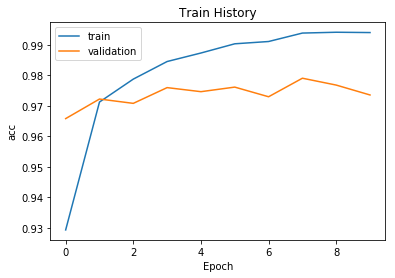

In [15]:
show_train_history(train_history,'acc','val_acc')

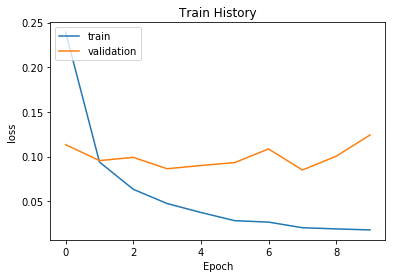

In [16]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [17]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 143us/step

accuracy= 0.9746


→增加一層的情況對評估模型的準確率有影響，但影響不大

# 訓練模型

# 課程目標:
了解MLP 在神經網路上的應用
# 範例重點:
以Keras 自帶的 手寫辨識的數據集來說明 MLP 建構的網路模型
# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
#宣告採用序列模型
model = Sequential()

In [8]:
#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [9]:
#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [10]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [11]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 23s 489us/step - loss: 0.2692 - acc: 0.9225 - val_loss: 0.1316 - val_acc: 0.9623
Epoch 2/10
48000/48000 [==============================] - 18s 368us/step - loss: 0.1067 - acc: 0.9684 - val_loss: 0.1011 - val_acc: 0.9699
Epoch 3/10
48000/48000 [==============================] - 18s 365us/step - loss: 0.0704 - acc: 0.9785 - val_loss: 0.0949 - val_acc: 0.9722
Epoch 4/10
48000/48000 [==============================] - 16s 341us/step - loss: 0.0509 - acc: 0.9845 - val_loss: 0.0817 - val_acc: 0.9756
Epoch 5/10
48000/48000 [==============================] - 15s 321us/step - loss: 0.0370 - acc: 0.9882 - val_loss: 0.0805 - val_acc: 0.9750
Epoch 6/10
48000/48000 [==============================] - 16s 330us/step - loss: 0.0263 - acc: 0.9918 - val_loss: 0.0727 - val_acc: 0.9786
Epoch 7/10
48000/48000 [==============================] - 16s 336us/step - loss: 0.0203 - acc: 0.9937 - val_loss: 0.

# 以圖形顯示訓練過程

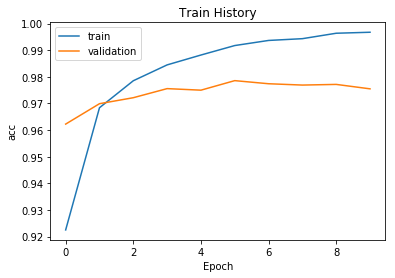

In [13]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
show_train_history(train_history,'acc','val_acc')

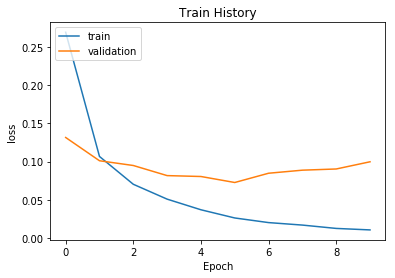

In [14]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [15]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 134us/step

accuracy= 0.9767


參考資料

[機器學習- 神經網路(多層感知機 Multilayer perceptron, MLP)運作方式](https://medium.com/@chih.sheng.huang821/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF-%E5%A4%9A%E5%B1%A4%E6%84%9F%E7%9F%A5%E6%A9%9F-multilayer-perceptron-mlp-%E9%81%8B%E4%BD%9C%E6%96%B9%E5%BC%8F-f0e108e8b9af)
[多層感知機](https://zh.wikipedia.org/wiki/%E5%A4%9A%E5%B1%82%E6%84%9F%E7%9F%A5%E5%99%A8)